# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
!pip install pandas matplotlib numpy citipy geopy requests
!pip install geoviews


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | remire-montjoly
Processing Record 3 of Set 1 | angaur state
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | angra do heroismo
Processing Record 6 of Set 1 | ain taya
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | atasu
Processing Record 13 of Set 1 | yuzhno-kurilsk
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | maumere
Processing Record 16 of Set 1 | kingston
Processing Record 17 of Set 1 | afaahiti
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | anadyr
Processing Record 20 of Set 1 | smithers
Processing Record 21 of Set 1 | plouzane
Processing Record 22 of Se

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,10.29,61,92,1.34,AU,1721774850
1,remire-montjoly,4.9167,-52.2667,28.02,78,0,1.54,GF,1721774851
2,angaur state,6.9060,134.1300,25.63,92,100,6.02,PW,1721774852
3,waitangi,-43.9535,-176.5597,9.34,99,100,4.47,NZ,1721774853
4,angra do heroismo,38.6500,-27.2167,24.34,83,20,0.45,PT,1721774854


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,10.29,61,92,1.34,AU,1721774850
1,remire-montjoly,4.9167,-52.2667,28.02,78,0,1.54,GF,1721774851
2,angaur state,6.9060,134.1300,25.63,92,100,6.02,PW,1721774852
3,waitangi,-43.9535,-176.5597,9.34,99,100,4.47,NZ,1721774853
4,angra do heroismo,38.6500,-27.2167,24.34,83,20,0.45,PT,1721774854


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

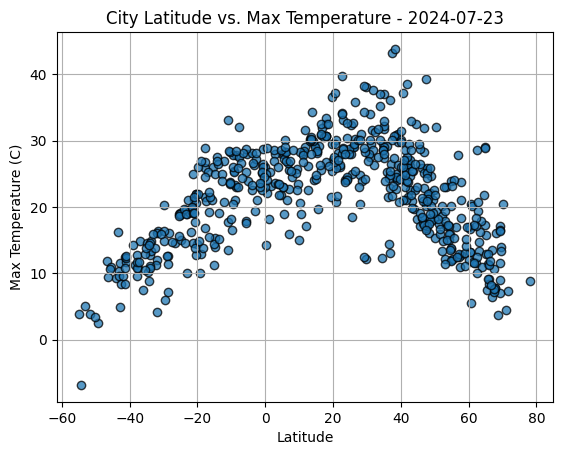

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='k', alpha=0.75)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature - {pd.Timestamp("today").strftime("%Y-%m-%d")}')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

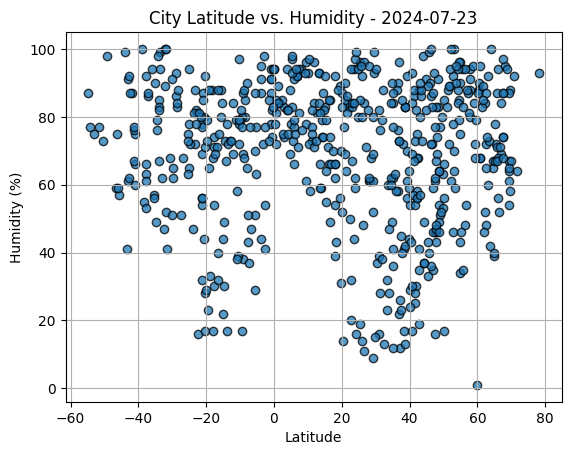

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='k', alpha=0.75)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity - {pd.Timestamp("today").strftime("%Y-%m-%d")}')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

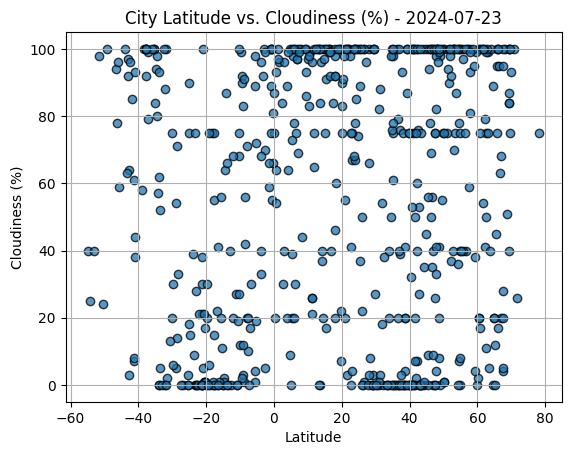

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='k', alpha=0.75)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) - {pd.Timestamp("today").strftime("%Y-%m-%d")}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

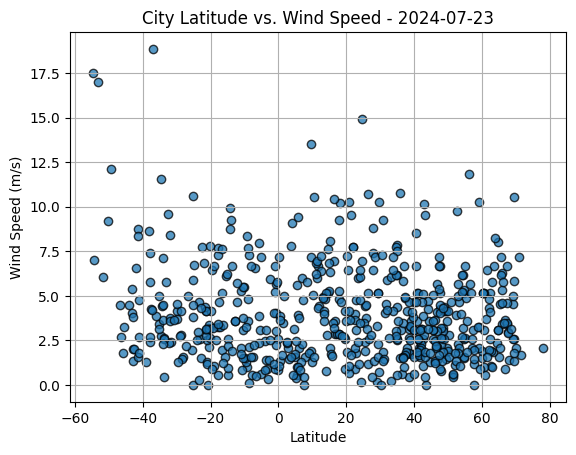

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='k', alpha=0.75)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed - {pd.Timestamp("today").strftime("%Y-%m-%d")}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    return slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq


In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,remire-montjoly,4.9167,-52.2667,28.02,78,0,1.54,GF,1721774851
2,angaur state,6.9060,134.1300,25.63,92,100,6.02,PW,1721774852
4,angra do heroismo,38.6500,-27.2167,24.34,83,20,0.45,PT,1721774854
5,ain taya,36.7933,3.2869,22.91,73,0,1.54,DZ,1721774855
10,atasu,48.6814,71.6433,22.13,54,41,3.17,KZ,1721774862


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,10.29,61,92,1.34,AU,1721774850
3,waitangi,-43.9535,-176.5597,9.34,99,100,4.47,NZ,1721774853
6,port-aux-francais,-49.3500,70.2167,2.54,98,100,12.12,TF,1721774856
7,adamstown,-25.0660,-130.1015,18.77,65,90,10.59,PN,1721774857
8,ushuaia,-54.8000,-68.3000,3.81,87,40,17.49,AR,1721774858


###  Temperature vs. Latitude Linear Regression Plot

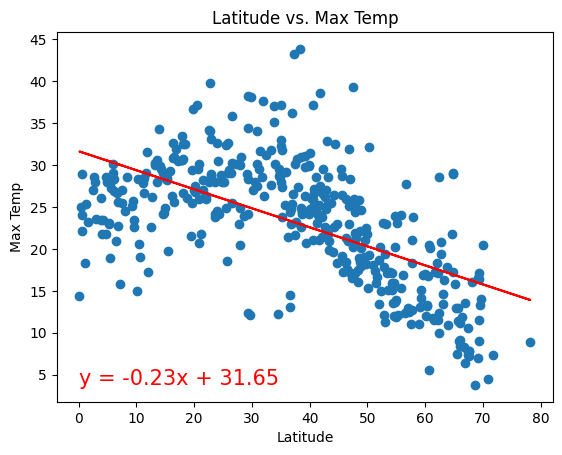

In [30]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function to perform linear regression
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = plot_linear_regression(x_values, y_values)

# Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
plt.title('Latitude vs. Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()



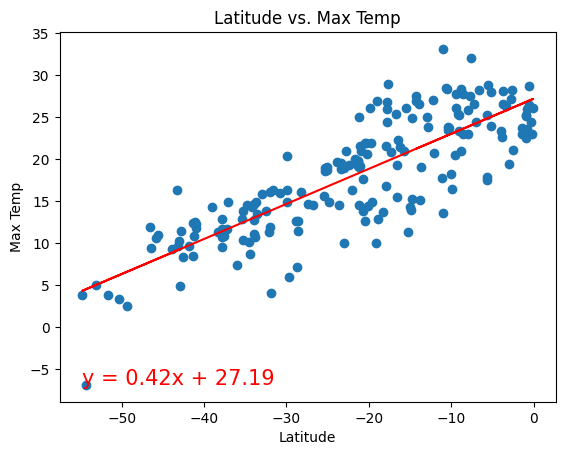

In [31]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function to perform linear regression
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = plot_linear_regression(x_values, y_values)

# Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
plt.title('Latitude vs. Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

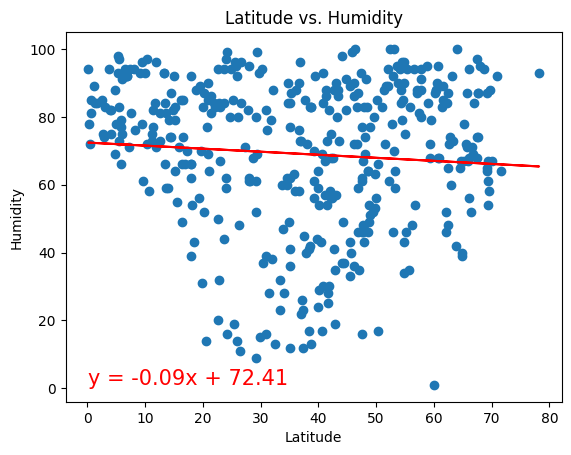

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function to perform linear regression
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = plot_linear_regression(x_values, y_values)

# Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

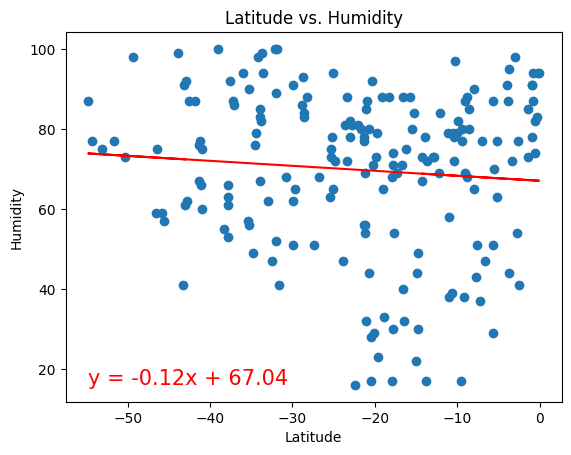

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function to perform linear regression
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = plot_linear_regression(x_values, y_values)

# Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

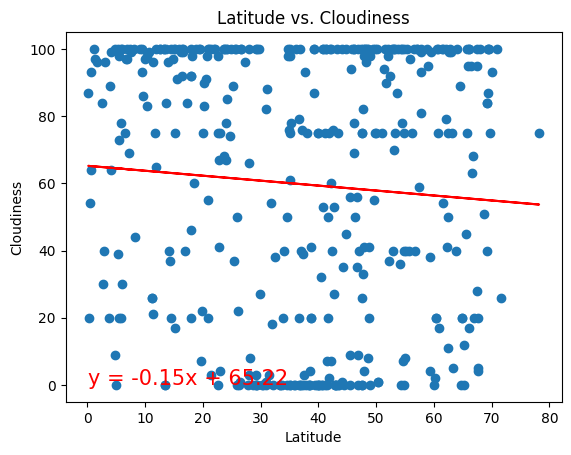

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function to perform linear regression
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = plot_linear_regression(x_values, y_values)

# Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

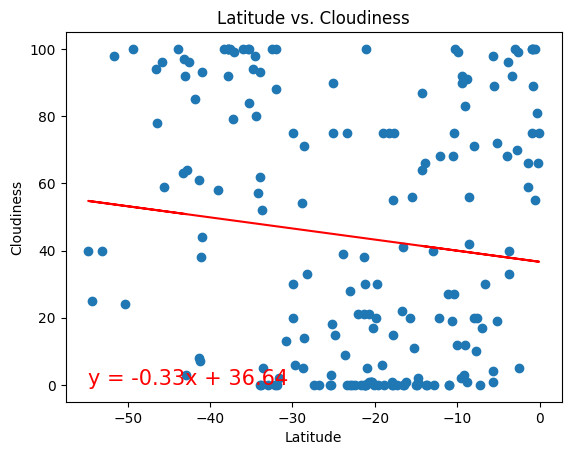

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function to perform linear regression
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = plot_linear_regression(x_values, y_values)

# Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

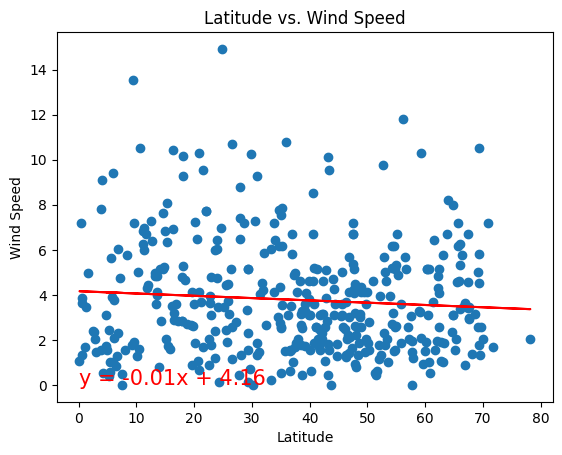

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Call the function to perform linear regression
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = plot_linear_regression(x_values, y_values)

# Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

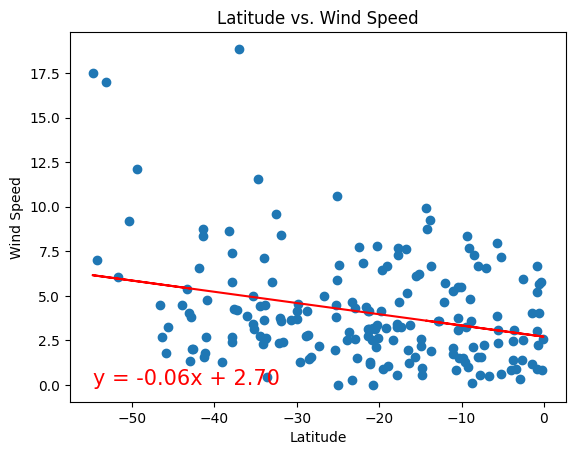

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the function to perform linear regression
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = plot_linear_regression(x_values, y_values)

# Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE